<a href="https://colab.research.google.com/github/PrusTalbot/PrusTalbot/blob/main/%D0%9F%D1%80%D0%B5%D0%B4%D0%B8%D0%BA%D1%82%D0%B8%D0%B2%D0%BD%D1%8B%D0%B9%20%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%2C%20%D0%92%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D0%B5%20%D1%80%D1%8F%D0%B4%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ПРЕДИКТИВНЫЙ АНАЛИЗ: ВРЕМЕННЫЕ РЯДЫ**

In [3]:
from google.colab import files
uploaded=files.upload()

Saving stationary_check1 - Нестационарный ряд.csv to stationary_check1 - Нестационарный ряд (1).csv
Saving stationary_check2 - Стационарный ряд.csv to stationary_check2 - Стационарный ряд (1).csv


In [4]:
import pandas as pd
data1 = pd.read_csv('stationary_check1 - Нестационарный ряд (1).csv')
print(data1)
data2 = pd.read_csv('stationary_check2 - Стационарный ряд (1).csv')
print(data2)

          Дата     Продажи
0   2023-01-01  101.549474
1   2023-01-02  113.781625
2   2023-01-03  111.122142
3   2023-01-04  110.192035
4   2023-01-05  136.520879
5   2023-01-06  151.563490
6   2023-01-07  172.302907
7   2023-01-08  182.023798
8   2023-01-09  176.126732
9   2023-01-10  186.976972
10  2023-01-11  189.514470
11  2023-01-12  195.799821
12  2023-01-13  202.937298
13  2023-01-14  249.507754
14  2023-01-15  234.903478
15  2023-01-16  245.619257
16  2023-01-17  247.472046
17  2023-01-18  277.774904
18  2023-01-19  263.861021
19  2023-01-20  287.872597
20  2023-01-21  291.045334
21  2023-01-22  313.869025
22  2023-01-23  314.891949
23  2023-01-24  318.193678
24  2023-01-25  339.718178
25  2023-01-26  354.283319
26  2023-01-27  360.665172
27  2023-01-28  373.024719
28  2023-01-29  373.656779
29  2023-01-30  386.372588
          Дата     Продажи
0   2023-01-01  117.640524
1   2023-01-02  104.001572
2   2023-01-03  109.787380
3   2023-01-04  122.408932
4   2023-01-05  118.675580
5

In [6]:
import plotly.express as px # импортируем библиотеку plotly.express
fig1 = px.line(data1, x='Дата', y='Продажи', title='Данные №1: Продажи на каждый день')
fig1.show() # создадим линейный график на основе датафрейма data1, указав даты на оси X (горизонтальной), а показатели продаж — на оси Y (вертикальной)

In [7]:
fig2 = px.line(data2, x='Дата', y='Продажи', title='Данные №2: Продажи на каждый день')
fig2.show()

In [8]:
from statsmodels.tsa.stattools import adfuller
time_series = data1['Продажи']  # Чтобы передать функции adfuller нужный аргумент, выделим столбец с временными данными из data1 и запишем его в отдельную переменную.

In [9]:
result = adfuller(time_series)
print('p-value: ', result[1])  # Функция adfuller возвращает значение p-value в качестве второго элемента, поэтому нас будет интересовать result c индексом 1.

p-value:  0.9980238538245101


*Мы получили значение p-value ~ 0.998. Пороговое значение для стационарности ряда 0,05. Так как наше значение больше порогового, мы считаем наш ряд нестационарным. Это значит, что его характеристики изменяются со временем.*

**ПОДГОТОВКА ДАННЫХ**



**Знакомство с данными**

В рамках этого урока мы будем работать с реальными данными об энергопотреблении домохозяйств. Задача нашего кейса — спрогнозировать напряжение в сети на ближайший месяц (30 дней).

In [10]:
from google.colab import files
uploaded=files.upload()

Saving Lesson_5_2_household_power_consumption.txt to Lesson_5_2_household_power_consumption.txt


1. **date** — дата в формате дд/мм/гггг;
2. **time** — время в формате чч:мм:сс;
3. '**Global_active_power**' — глобальная активная мощность домашних хозяйств, усредненная по минутам (в киловаттах);
4. **global_reactive_power** — глобальная реактивная мощность домашних хозяйств, усредненная по минутам (в киловаттах);
5. **voltage** — усредненное по минутам напряжение (в вольтах);
6. **global_intensity** — глобальная усредненная по минутам сила тока в домашних хозяйствах (в амперах);
7. **sub_metering_1** — дополнительный замер энергии № 1 (в ватт-часах активной энергии). Это соответствует кухне, содержащей в основном посудомоечную машину, духовку и микроволновую печь (плиты не электрические, а газовые);
8. **sub_metering_2** — дополнительный замер энергии № 2 (в ватт-часах активной энергии). Она соответствует прачечной, в которой есть стиральная машина, сушилка для белья, холодильник и свет;
9. **sub_metering_3** — дополнительный замер энергии № 3 (в ватт-часах активной энергии). Он соответствует электрическому водонагревателю и кондиционеру.

*Активная мощность — эта такая мощность тока, которая потребляется различными приборами: лампой, электроплитой, феном и т. д. Такую мощность можно назвать «полезной».*

*Реактивная мощность не выполняет полезной работы. Она представляет собой энергию, которая перекачивается из источника тока к реактивным элементам (конденсатор, катушка, генератор и т. п.), а потом возвращается обратно в источник за время одного периода колебания. *

**Предобработка данных**

Прежде, чем загрузить данные и приступить к предобработке, зададим словарь, в котором ключом будет являться имя столбца, а значением — его тип.

Словарь нужен нам, чтобы не просто импортировать данные, а прописать каждому столбцу точные значения.

In [21]:
d_types = {'Date' : 'str',
                        'Time' : 'str',
                        'Global_active_power' : 'float',
                        'Global_reactive_power' : 'float',
                        'Voltage' : 'float',
                        'Global_intensity' : 'float',
                        'Sub_metering_1' : 'float',
                        'Sub_metering_2' : 'float',
                        'Sub_metering_3' : 'float'}

In [22]:
import pandas as pd
df = pd.read_csv('Lesson_5_2_household_power_consumption.txt',
                                      sep = ';', # зададим знак разделения столбцов
                                      na_values = ['nan','?'], # укажем, какие значения должны считаться как пропущенные данные, в данном случае, значения 'nan' и '?'
                                      dtype = d_types)
display(df.head())

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


Уменьшим количество переменных, объединив дату и время в одну переменную.

In [23]:
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], dayfirst = True)
# создадим новый столбец, значения которого будут содержать  результат преобразования столбцов 'Date' и 'Time' в формат datetime — для этого используем функцию pd.to_datetime из библиотеки Pandas

Удалим ненужные переменные:

In [24]:
del df['Date']
del df['Time']

**Изучение зависимостей**

посмотрим, как изменялось напряжение на протяжении последних четырех лет. Для этого построим линейный график зависимости напряжения от времени с помощью библиотеки matplotlib:

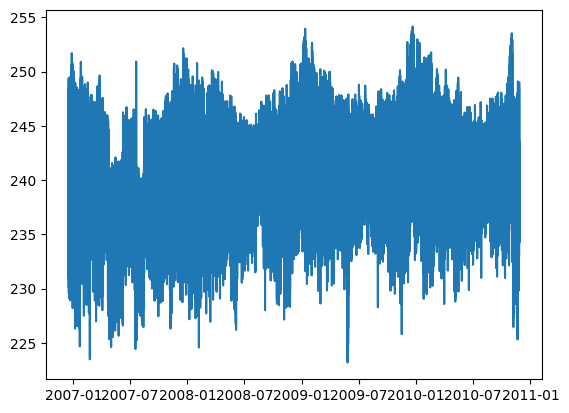

In [25]:
import matplotlib.pyplot as plt
plt.plot(df['Datetime'], df['Voltage'])

*По линейному графику не очень понятно, какое напряжение встречается чаще всего. Да, мы видим, что за границу 250 и 230 напряжение выходит редко, но как оно распределено внутри, определить сложно.*

*Решить эту проблему поможет гистограмма, построенная по столбцу Voltage.*

(array([3.26000e+02, 3.15000e+03, 2.18760e+04, 1.01749e+05, 3.27196e+05,
        7.90841e+05, 6.15609e+05, 1.62133e+05, 2.51140e+04, 1.28600e+03]),
 array([223.2  , 226.295, 229.39 , 232.485, 235.58 , 238.675, 241.77 ,
        244.865, 247.96 , 251.055, 254.15 ]),
 <BarContainer object of 10 artists>)

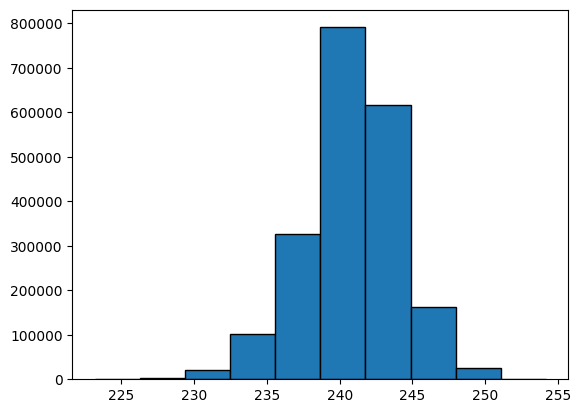

In [26]:
plt.hist(df['Voltage'], bins = 10, edgecolor = 'k')

*На основании графика и гистограммы можем сделать вывод, что напряжение находится в диапазоне от 225 до 255 В. Наиболее часто встречающееся значение напряжения — 240 В.*

**Построим корреляционную матрицу и тепловую карту.**

In [27]:
import seaborn as sns
df.corr()

<ipython-input-27-e6b7dc634288>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Global_active_power,1.000000,0.247017,-0.399762,0.998889,0.484401,0.434569,0.638555
Global_reactive_power,0.247017,1.000000,-0.112246,0.266120,0.123111,0.139231,0.089617
Voltage,-0.399762,-0.112246,1.000000,-0.411363,-0.195976,-0.167405,-0.268172
Global_intensity,0.998889,0.266120,-0.411363,1.000000,0.489298,0.440347,0.626543
Sub_metering_1,0.484401,0.123111,-0.195976,0.489298,1.000000,0.054721,0.102571
Sub_metering_2,0.434569,0.139231,-0.167405,0.440347,0.054721,1.000000,0.080872
Sub_metering_3,0.638555,0.089617,-0.268172,0.626543,0.102571,0.080872,1.000000


<ipython-input-28-aa4f4450a243>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

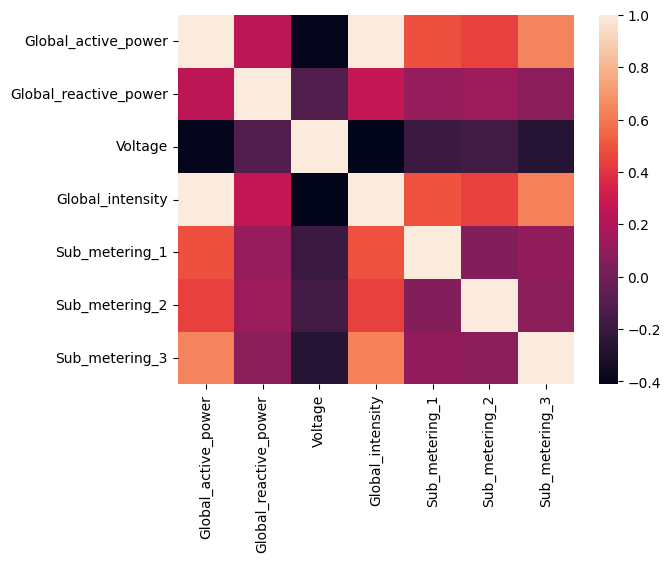

In [28]:
sns.heatmap(df.corr())

**На основании корреляционной матрицы можно сделать вывод, что:**
1. переменная «глобальная активная мощность» слабо обратно коррелирует с переменной «напряжение»;*
2. переменная «сила тока» имеет единичную корреляцию с переменной «глобальная активная мощность».*


*Эти выводы также можно подкрепить тем, что активная мощность рассчитывается как напряжение, умноженное на силу тока и коэффициент мощности*

(cosφ): P=U*I*cosφ

*Так как подводимое к бытовым электроприборам электричество должно обладать постоянным напряжением, изменение активной мощности будет зависеть только от силы тока. При этом прямо пропорционально: во сколько раз увеличится сила тока — во столько же раз увеличится и активная мощность, и наоборот.*


*В данном случае мы будем строить прогноз по одной конкретной переменной, но в общем случае не рекомендуется использовать в качестве объясняющих переменных сильно коррелирующие переменные вместе.*

**Прогнозирование временных рядов в Prophet**

In [35]:
!pip install prophet
from prophet import Prophet  #"Импорт библиотеки"

**Создание датафрейма для моделирования**

 В данной модели будет прогнозироваться усредненное значение напряжения в сети, поэтому нам нужно будет сгруппировать изначальные данные по дням и посчитать среднее:

In [37]:
import warnings
df_for_modelling = df[['Datetime', 'Voltage']].groupby([df['Datetime'].dt.date]).mean()

<ipython-input-37-2783e6308543>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



*Этот код выполняет следующие действия:*

1. df[['Datetime', 'Voltage']] создает новый DataFrame, содержащий только две колонки: Datetime и Voltage — подмножество данных из исходного DataFrame;
2. groupby([df['Datetime'].dt.date]) использует метод groupby для группировки данных по значению в колонке Datetime;
3. df['Datetime'].dt.date преобразует значения в колонке Datetime в даты (без времени), и затем данные группируются по этим датам;


*После группировки данных по датам применяется метод mean(), который вычисляет среднее значение для каждой группы. В данном случае, он вычисляет среднее значение напряжения (Voltage) для каждой даты.*

In [38]:
df_for_modelling.tail(2)

,Voltage
Datetime,
2010-11-25,241.536257
2010-11-26,240.291029


In [40]:
df_for_modelling = df_for_modelling.reset_index() # Сбрасываем индекс
df_for_modelling.tail(2)

,index,Datetime,Voltage
1440,1440,2010-11-25,241.536257
1441,1441,2010-11-26,240.291029


Приведем имена столбцов в датафрейме в соответствие требованиям. Столбец, содержащий дату, должен наименоваться ds, столбец содержащий значения — y. Для переименования используем метод **rename**.

In [41]:
df_for_modelling = df_for_modelling.rename(columns = {'Datetime':'ds', 'Voltage':'y'})

**Инициализация модели прогнозирования**

Настроим сезонность в нашей модели. Всего в Prophet существует три параметра сезонности:
1. Yearly_seasonality — годовая сезонность;
2. Weekly_seasonality — недельная сезонность;
3. Daily_seasonality — дневная сезонность.


Мы будем использовать их все. Чтобы модель автоматически искала и включала каждый вид сезонности в анализ, установим для этих параметров значение **True**.

In [42]:
model = Prophet(weekly_seasonality = True, yearly_seasonality = True, daily_seasonality = True)

Укажем, что хотим отследить изменение потребления во время государственных праздников США.

Для этого импортируем перечень праздников и включим их в модель с помощью метода **add_country_holidays()**, передав в него значение **country_name = 'US'**.

Учет праздников является важным аспектом прогнозирования временных рядов, поскольку праздники могут оказывать значительное влияние на поведение данных. Например, в праздничные дни может наблюдаться рост или снижение спроса на определенные ресурсы.

In [43]:
model.add_country_holidays(country_name = 'US')

**Обучение модели**


Обучим модель с помощью метода fit(). В процессе обучения модель проанализирует временные ряды и определит закономерности, тренды и сезонные компоненты.

In [44]:
model.fit(df_for_modelling)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpv12yrhzf/l_2fnjw9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv12yrhzf/w880o8u3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78001', 'data', 'file=/tmp/tmpv12yrhzf/l_2fnjw9.json', 'init=/tmp/tmpv12yrhzf/w880o8u3.json', 'output', 'file=/tmp/tmpv12yrhzf/prophet_modelwqmw9sbc/prophet_model-20231130122824.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:28:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:28:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


***Установим период, на который необходимо сделать прогноз. ***

В качестве примера сделаем прогноз на ближайший месяц.


Далее необходимо сформировать список дат, на которые будет строиться прогноз.
1. Функция **make_future_dataframe**() принимает аргумент **periods**, в котором необходимо указать количество необходимых периодов.

Также важно обратить внимание на необязательный аргумент **freq**. Если он не указан, то список дат будет генерироваться с шагом в 1 день (как нам и требуется в условии задачи).


Иногда могут пригодиться и другие значения шага, например, месяц (M), неделя (W) или час (H).

In [45]:
# cоздадим новый новый DataFrame с помощью метода make_future_dataframe(), укажем аргумент periods = 30, который задает прогнозирование на 30 периодов вперед, и аргумент freq = 'D',
# который задает продолжительность периода, равную одному дню
predictions_period = model.make_future_dataframe(periods = 30, freq ='D')

# используется срез предсказательного периода, чтобы выбрать только последние 30 строк из созданного DataFrame.
predictions_period = predictions_period[-30:]

**Построение прогноза**


Построим прогноз на основе заданного периода, используя метод **predict**(). Этот метод анализирует структуру и параметры модели, а также использует информацию из прогнозного периода для выполнения прогнозирования будущих значений временного ряда.

In [46]:
forecast = model.predict(predictions_period)
print(forecast)

           ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2010-11-27  239.154393  239.779068  242.906856   239.154393   239.154393   
1  2010-11-28  239.152844  240.217535  243.421632   239.152844   239.152844   
2  2010-11-29  239.151294  240.608606  243.623073   239.151294   239.151294   
3  2010-11-30  239.149745  240.507264  243.568750   239.149745   239.149745   
4  2010-12-01  239.148195  240.753782  243.818926   239.148195   239.148195   
5  2010-12-02  239.146646  240.790287  243.970362   239.146646   239.146646   
6  2010-12-03  239.145096  240.889752  244.126786   239.145096   239.145096   
7  2010-12-04  239.143546  240.780335  243.965765   239.143546   239.143546   
8  2010-12-05  239.141997  241.308943  244.421333   239.141997   239.141997   
9  2010-12-06  239.140447  241.478659  244.700302   239.140447   239.140447   
10 2010-12-07  239.138898  241.499583  244.729902   239.138898   239.138898   
11 2010-12-08  239.137348  241.637118  244.847276   

**Визуализация прогноза**

*Построенный прогноз содержит 67 столбцов. Однако только четыре из них являются интересными для большинства аналитических задач.*

1. ds — столбец с датами;
2. 'yhat' — усредненное прогнозное значение;
3. 'yhat_lower', 'yhat_upper' — верхняя и нижняя граница прогнозного интервала соответственно.


Прогнозный интервал технически похож на доверительный интервал, который мы разбирали на предыдущем уроке.


**Важно: если вы выполните прогноз повторно, он будет незначительно отличаться. Это специфика работы Prophet.**

Визуализируем построенный прогноз с помощью метода **plot**(). В качестве аргумента укажем переменную **forecast**, которая содержит прогнозные значения.

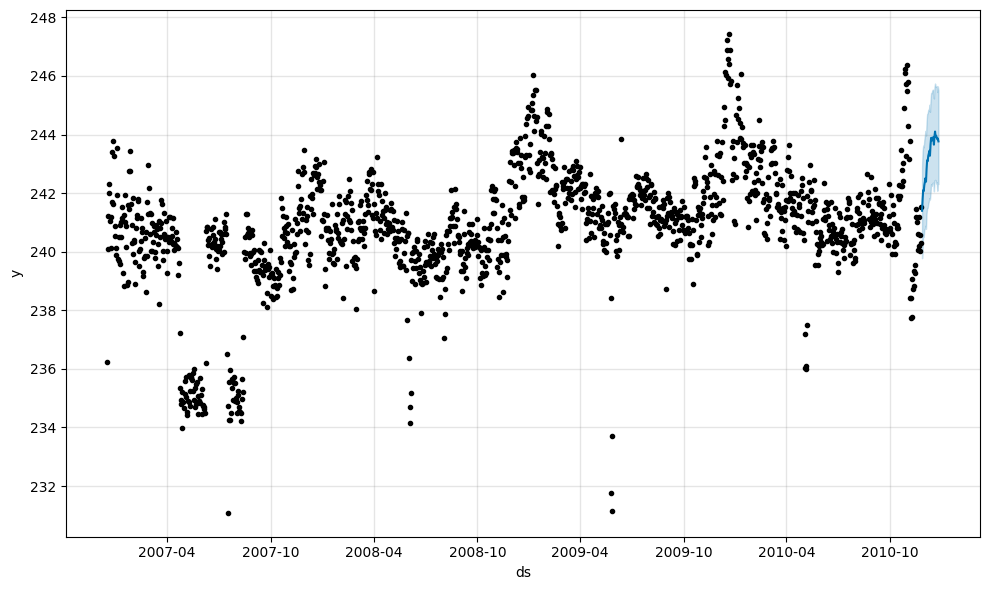

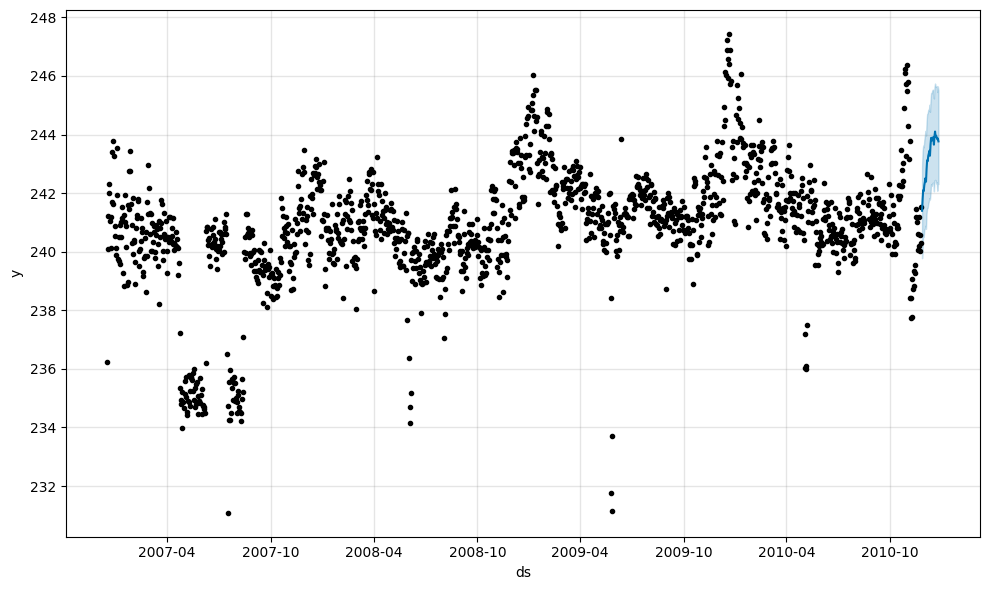

In [47]:
model.plot(forecast)

Дополнительно построим декомпозицию по компонентам:

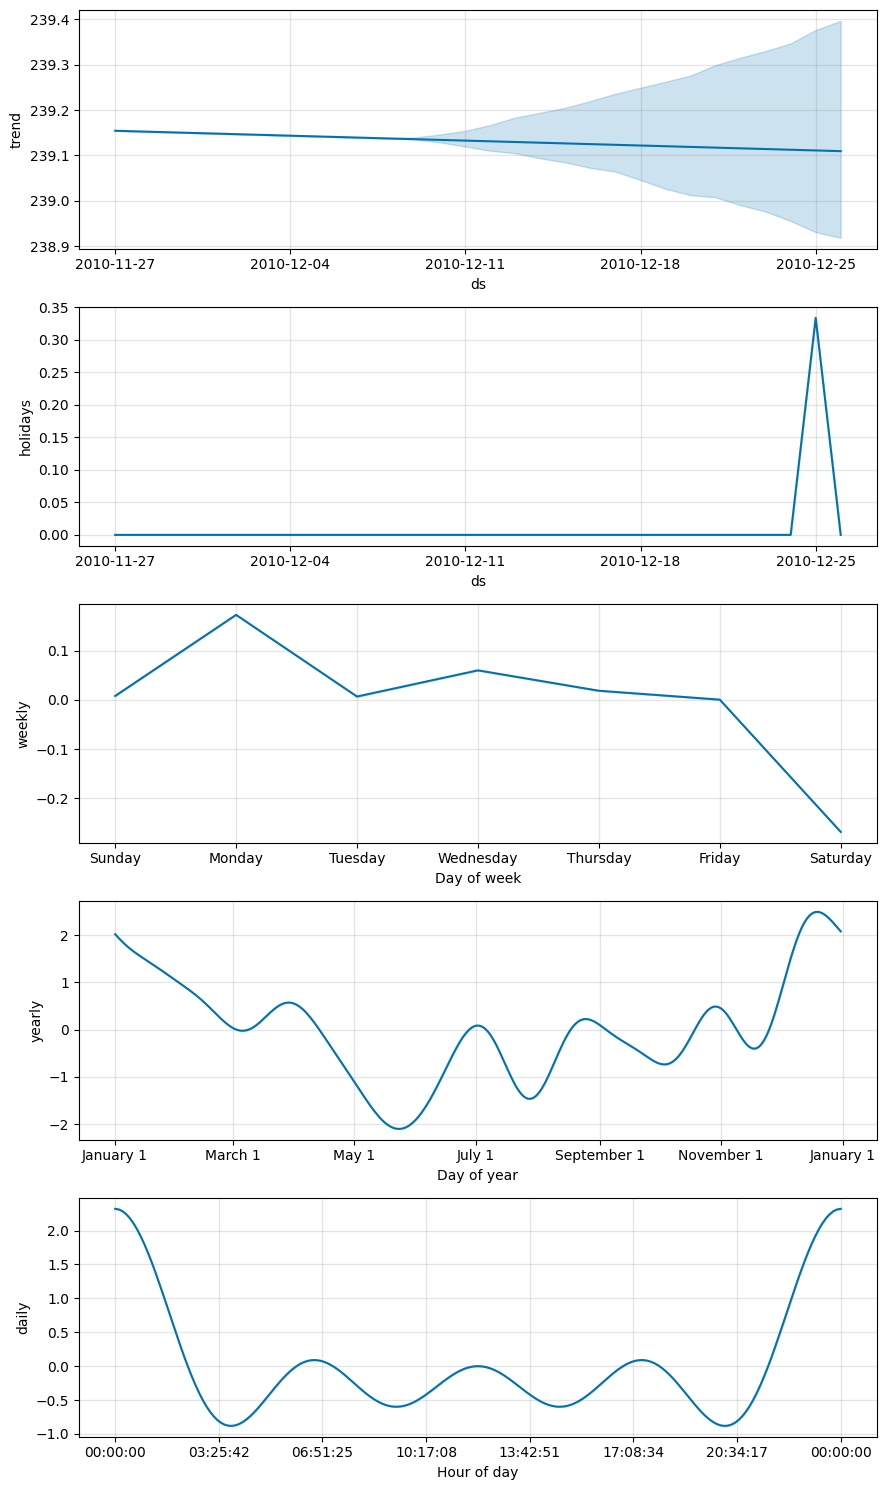

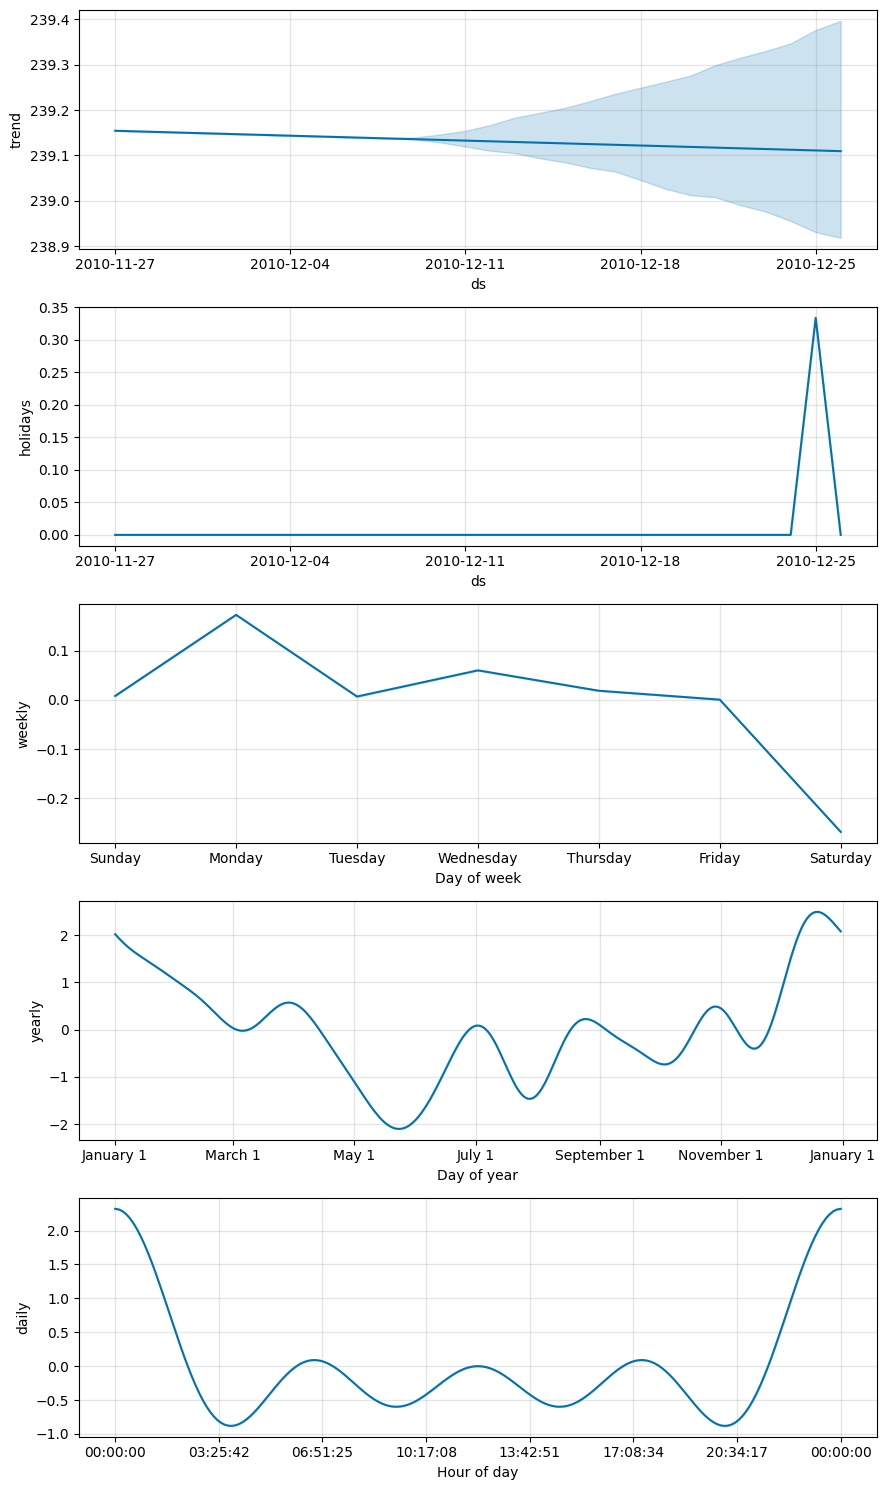

In [48]:
model.plot_components(forecast)

***На получившихся графиках видно, что модель обнаружила различные сезонности, например:***
1. *изменение напряжения на Рождество (25 декабря) и на Новый год;*
2. *различное напряжение в зависимости от дня недели;*
3. *снижение напряжения в летнее время;*
4. *рост напряжения в вечерний прайм-тайм (время, когда все возвращаются с работы и активно используют электричество).*


*На основе этих наблюдений можно сделать вывод, что Prophet хорошо справляется с задачей прогнозирования временного ряда. Она учитывает различные сезонные эффекты, такие как изменение напряжения на Рождество и Новый год, зависимость от дня недели и снижение напряжения в летнее время.*

*Кроме того, модель обнаруживает и другие закономерности, такие как увеличение напряжения в вечерний прайм-тайм. Это подтверждает, что Prophet является мощным инструментом для анализа и прогнозирования.*